In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools
import matplotlib.pyplot as plt
import numpy as np


In [2]:
plateaus = getters.get_plateaus()

path_to_data = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/"
dates= ["20230221","20230222","20230223","20230224"]

/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json


/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json


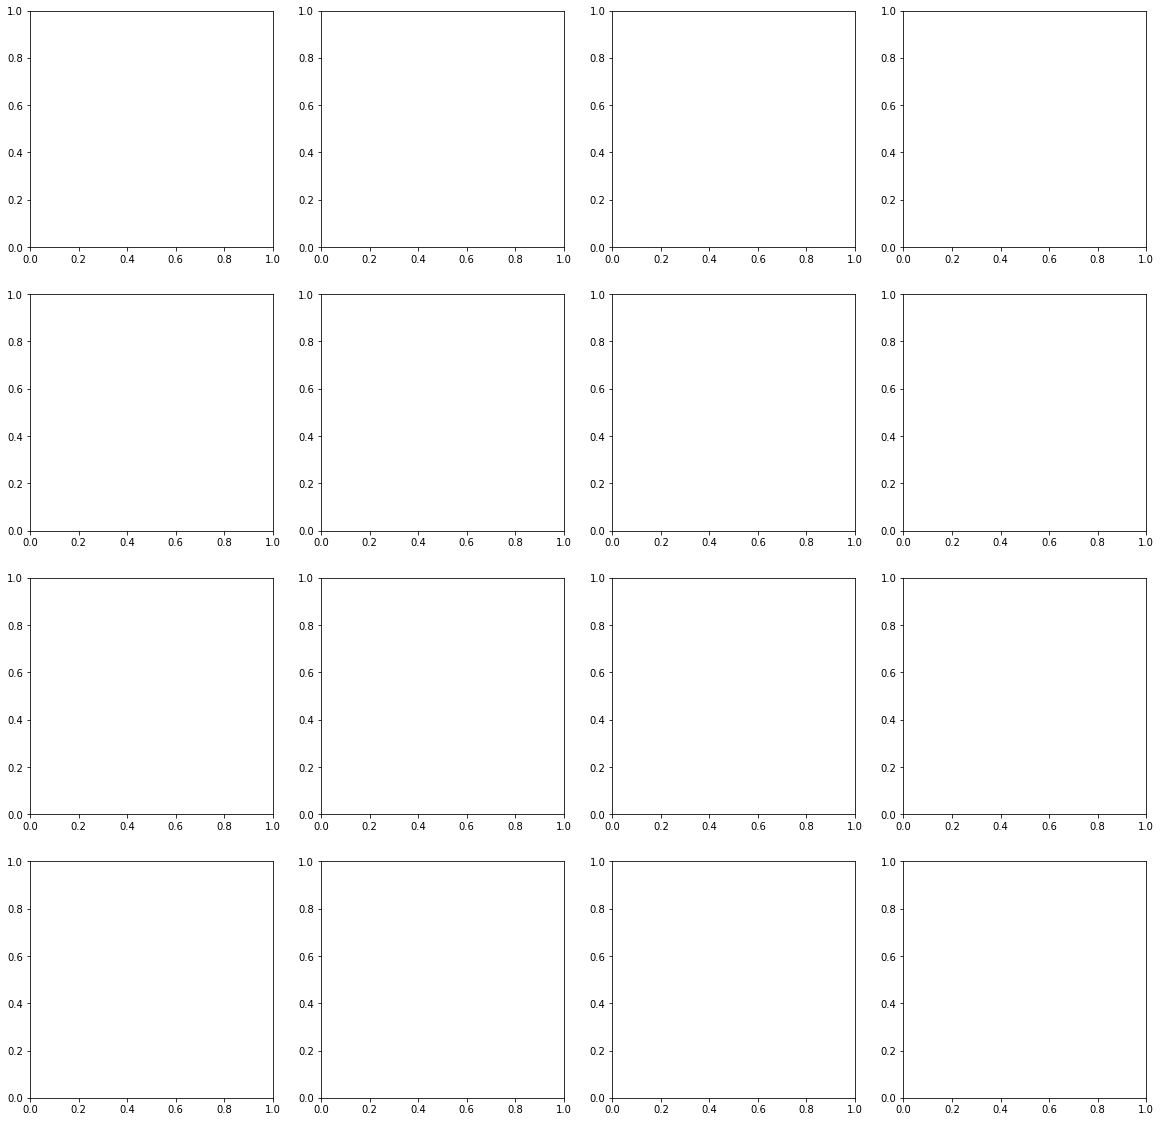

In [3]:
plateaus = getters.get_plateaus()
keys = list(plateaus["20230224"].keys())

fig, axes = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
ax = {}
cnt = 0
for i in axes:
    for j in i:
        try:
            ax[keys[cnt]] = j
            cnt += 1
        except:
            ax["noname"] = j
            continue


In [39]:
calib_constants = []
cnt = 0
for date in dates:
    data = getters.get_raw_data(path_to_data+date+"/", filetype="peaks", pol="Av")
    if cnt == 0:
        wlref = data.sort_values(by="Timestamp").reset_index(drop=True)
    plateaus = getters.get_plateaus()
    data_cut = tools.cut_plat(data, plateaus, date)
    for plateau in plateaus[date]:
        data_cut[plateau].sort_values(by="Timestamp").reset_index(drop=True)
        t0 = data_cut[plateau]["Timestamp"][0]
        ax[plateau].plot(data_cut[plateau]["Timestamp"]-t0,
                        ((data_cut[plateau]["Wav1-1"] - wlref["Wav1-1"][0]) - (data_cut[plateau]["Wav1-2"] - wlref["Wav1-2"][0]))*1e12,
                        label=date)
        ax[plateau].set_title(plateau)
        ax[plateau].set_xlabel("Time (s)")
        ax[plateau].set_ylabel("Wavelength Offset (pm)")
        ax[plateau].legend()
        for sens in data_cut[plateau].columns:
            if sens == "Timestamp" or sens == "Wav1-1":
                continue
            calib_constants.append(np.mean((data_cut[plateau]["Wav1-1"] - wlref["Wav1-1"][0]) - (data_cut[plateau][sens] - wlref[sens][0]))*1e12)
    cnt += 1

Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:10<00:00,  2.18it/s]


/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json
Keys to read: ['10Av2', '1Av1', '1Av2', '1Av3', '2Av1', '2Av2', '2Av3', '3Av1', '3Av2', '3Av3', '4Av1', '4Av2', '4Av3', '5Av1', '5Av2', '5Av3', '6Av1', '6Av2', '6Av3', '7Av1', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 23/23 [01:02<00:00,  2.73s/it]


/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json
Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '1Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 14/14 [00:15<00:00,  1.10s/it]


/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json
Keys to read: ['10Av2', '10Av3', '10Av4', '11Av2', '11Av3', '11Av4', '12Av2', '12Av3', '12Av4', '13Av2', '13Av3', '13Av4', '14Av2', '14Av3', '14Av4', '15Av2', '15Av3', '15Av4', '16Av2', '16Av3', '16Av4', '17Av2', '17Av3', '17Av4', '18Av2', '18Av3', '18Av4', '19Av2', '19Av3', '19Av4', '1Av1', '1Av2', '1Av3', '1Av4', '20Av2', '20Av3', '20Av4', '21Av2', '21Av4', '2Av2', '2Av3', '2Av4', '3Av2', '3Av3', '3Av4', '4Av2', '4Av3', '4Av4', '5Av2', '5Av3', '5Av4', '6Av2', '6Av3', '6Av4', '7Av2', '7Av3', '7Av4', '8Av2', '8Av3', '8Av4', '9Av2', '9Av3', '9Av4']


Reading peaks key: Av: 100%|██████████| 63/63 [05:17<00:00,  5.04s/it]


/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json


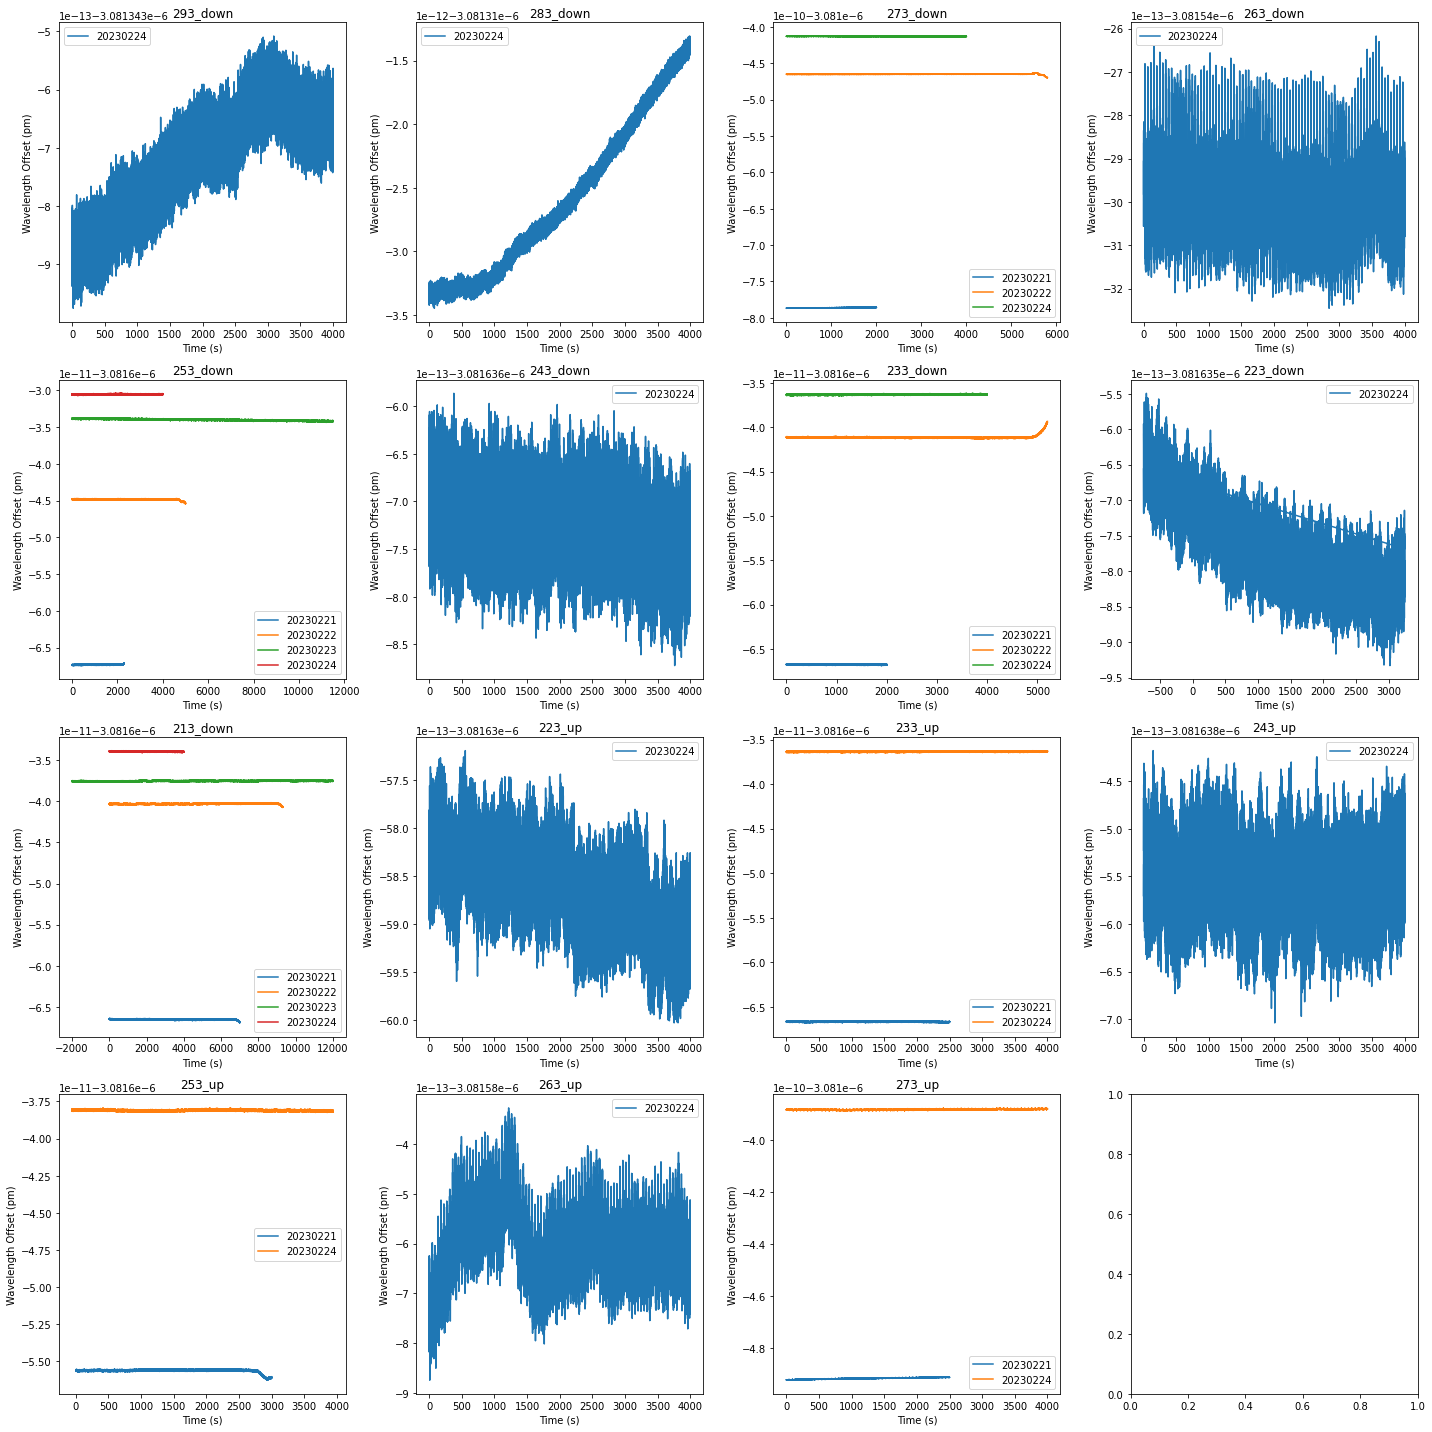

In [42]:
fig.tight_layout()
fig

In [ ]:
calib_constants = []
for date in dates:
    data = getters.get_raw_data(path_to_data+date+"/", filetype="peaks", pol="Av")
    if cnt == 0:
        wlref = data.sort_values(by="Timestamp").reset_index(drop=True)
    plateaus = getters.get_plateaus()
    data_cut = tools.cut_plat(data, plateaus, date)
    for plateau in plateaus[date]:
        data_cut[plateau].sort_values(by="Timestamp").reset_index(drop=True)
        t0 = data_cut[plateau]["Timestamp"][0]
        for sens in data_cut[plateau].columns:
            if sens == "Timestamp" or sens == "Wav1-1":
                continue
            calib_constants.append(np.mean((data_cut[plateau]["Wav1-1"] - wlref["Wav1-1"][0]) - (data_cut[plateau][sens] - wlref[sens][0]))*1e12)

In [41]:
print(calib_constants)

[0         513.549661
1         513.595818
2         513.553200
3         513.597074
4         513.626773
             ...    
249992    514.541222
249993    514.520329
249994    514.525402
249995    514.527358
249996    514.573675
Length: 249997, dtype: float64, 0         30.233773
1         30.255187
2         30.248151
3         30.263277
4         30.301352
            ...    
249992    30.281118
249993    30.250531
249994    30.259635
249995    30.234856
249996    30.275560
Length: 249997, dtype: float64, 0         100.668737
1         100.679333
2         100.689852
3         100.711800
4         100.702593
             ...    
249992    100.512626
249993    100.495411
249994    100.494225
249995    100.501614
249996    100.528912
Length: 249997, dtype: float64, 0        -109.311428
1        -109.309985
2        -109.291444
3        -109.282638
4        -109.263820
             ...    
249992   -109.382108
249993   -109.388796
249994   -109.377701
249995   -109.400037
249996   -1

Text(0.5, 1.0, 'Offsets distribution wrt to sensor 1')

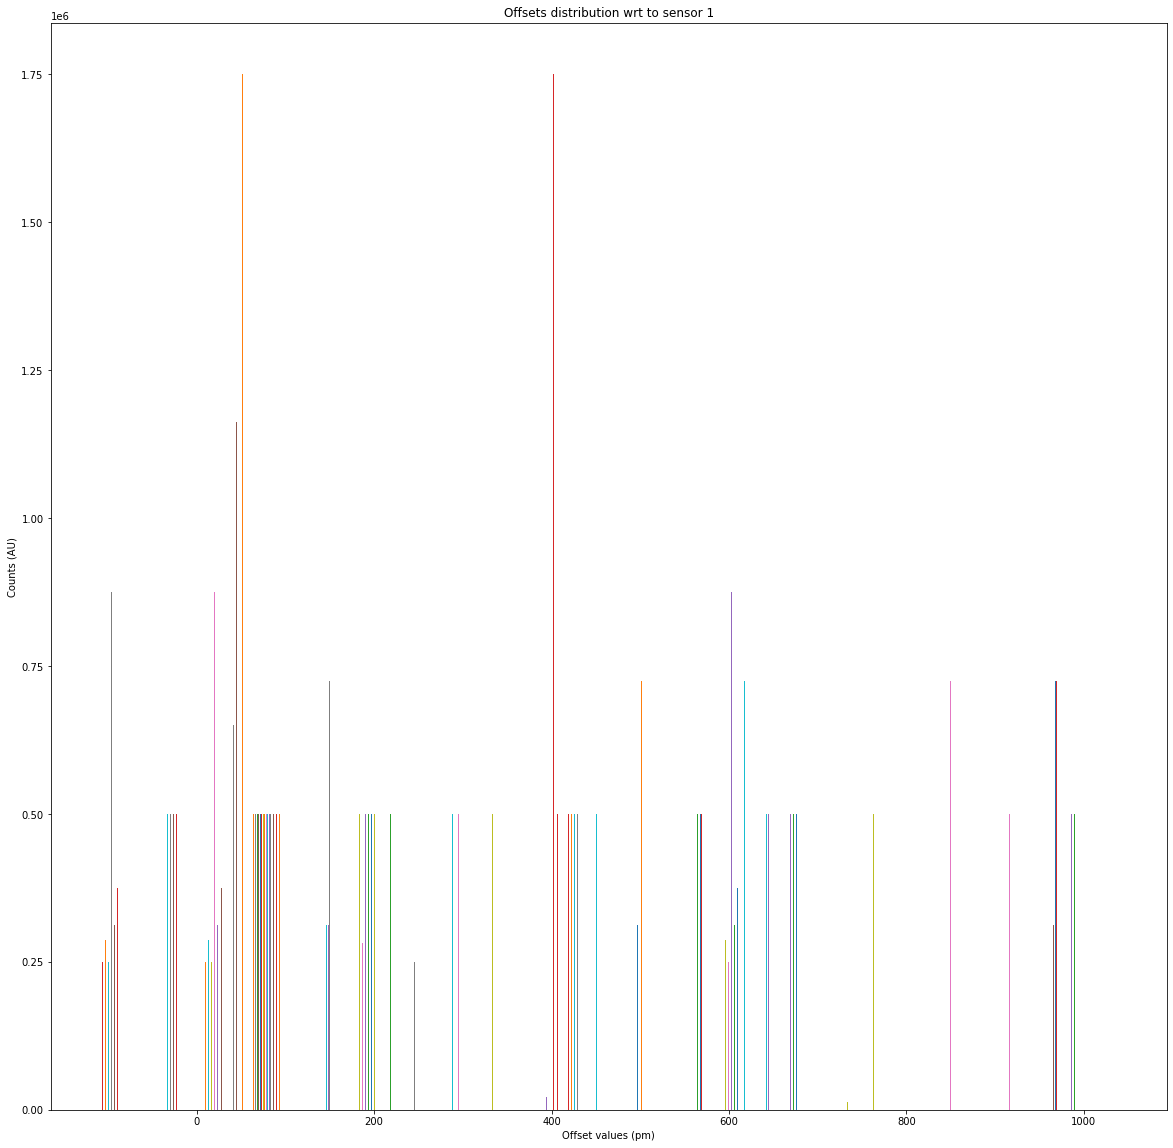

In [43]:
plt.figure(figsize=(20,20))
plt.hist(calib_constants, label="Offsets wrt Wav1-1")
plt.xlabel("Offset values (pm)")
plt.ylabel("Counts (AU)")
plt.title("Offsets distribution wrt to sensor 1")
